In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time as champ
from ipywidgets import *

In [2]:
nc = 60;
W  = [0]*nc;
s  = 0.005;
n  = 97;

In [3]:
#SO(2) oscillator

alpha = 1.01
phi   = 0.065

w11 = alpha*math.cos(phi)
w12 = alpha*math.sin(phi)
w21 =-w12
w22 = w11

t   = [0] * n
x   = [0] * n
y   = [0] * n

x[0]=-0.2012
y[0]= 0.0

for k in range(1, n):
    t[k]=k
    x[k]=np.tanh(w11*x[k-1]+w12*y[k-1]);
    y[k]=np.tanh(w22*y[k-1]+w21*x[k-1]);

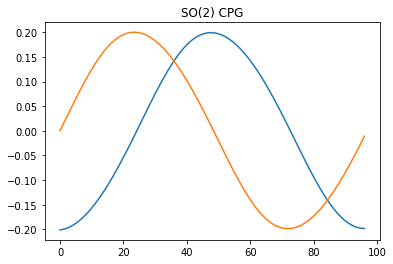

In [4]:
#PLOT SO(2)
plt.plot(t,x,t,y)
plt.title("SO(2) CPG")
fig = plt.gcf()

In [5]:
#Generate centers
ci = np.asarray(np.around(np.linspace(1, len(x), nc)), dtype=int)

cx = [0] * (len(ci))
cy = [0] * (len(ci))

for k in range(len(ci)-1):
    cx[k] = x[ci[k]]
    cy[k] = y[ci[k]]

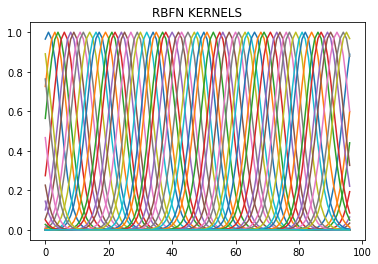

In [6]:
K = [0] * (nc)

np.exp(-(np.power((x-cx[1]),2)))

for i in range(nc):
    rx   = [q - cx[i] for q in x]
    ry   = [q - cy[i] for q in y]
    K[i] = np.exp(-(np.power((rx),2) + np.power((ry),2))/s)
    
for i in range(nc):
    plt.plot(t, K[i])

plt.title("RBFN KERNELS")
fig = plt.gcf()

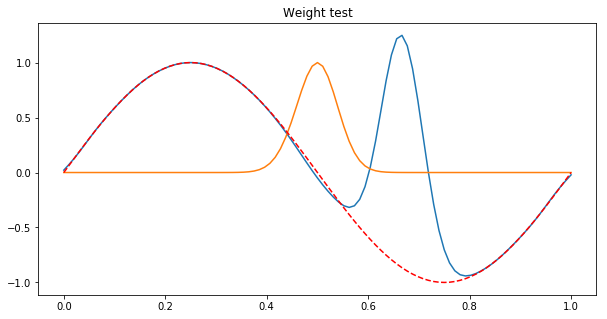

In [7]:
W  = [1] * nc
alpha=0.1
network_output=0

#Generating target motion
time=np.linspace(0,1,n);
target = []
#target=-sin(2*pi*t)+sin(4*pi*t);
#target=-sin(2*pi*t)+sin(4*pi*t).^2;
for t in time:
    #target.append(-np.power(math.sin(2*math.pi*t),2)+np.power(math.sin(4*math.pi*t),2));
    target.append(math.sin(2*math.pi*t));

# plt.plot(time, target)
# plt.title("TARGET")
# fig = plt.gcf()
global network_output_collector_collector
network_output_collector_collector = []

outH1=[]
outH2=[]

for i in range(175):
    network_output_collector = []

    for t in range(n):
        if t==0:
            outH1.append(-0.2012)
            outH2.append(0.0)
        else:
            outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
            outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))

        for j in range(nc):
            K = np.exp(-(np.power((outH1[t]-cx[j]),2)+np.power((outH2[t]-cy[j]),2))/s)
            network_output = network_output + (W[j] * K)

        network_output_collector.append(network_output)
        
        network_output = 0;

    for k in range(nc-1):
        W[k] = W[k] + alpha * (target[ci[k]] - network_output_collector[ci[k]])
        
    network_output_collector_collector.append(network_output_collector)

# def update(w):
#     plt.plot(time, network_output_collector_collector[w], time, target)

# interact(update, w = widgets.IntSlider(value=100,
#                                                min=1,
#                                                max=25,
#                                                step=1


outH1=[]
outH2=[]
modi_kernel_output = []
network_output_collector = []
modification = [1] * len(W)
modi_kernel = 29
modification[modi_kernel] = modification[modi_kernel] - 50
modification[modi_kernel+10] = modification[modi_kernel+10] - 15

for t in range(n):
        if t==0:
            outH1.append(-0.2012)
            outH2.append(0.0)
        else:
            outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
            outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))

        for j in range(nc):
            K = np.exp(-(np.power((outH1[t]-cx[j]),2)+np.power((outH2[t]-cy[j]),2))/s)
            network_output = network_output + ((W[j]*modification[j]) * K)
            
            if j==modi_kernel:
                modi_kernel_output.append(K)

        network_output_collector.append(network_output)
        
        network_output = 0;

fig=plt.figure(figsize=(10, 5))                
plt.plot(time, network_output_collector, time, modi_kernel_output, time, target, 'r--')
plt.title("Weight test")
fig = plt.gcf()


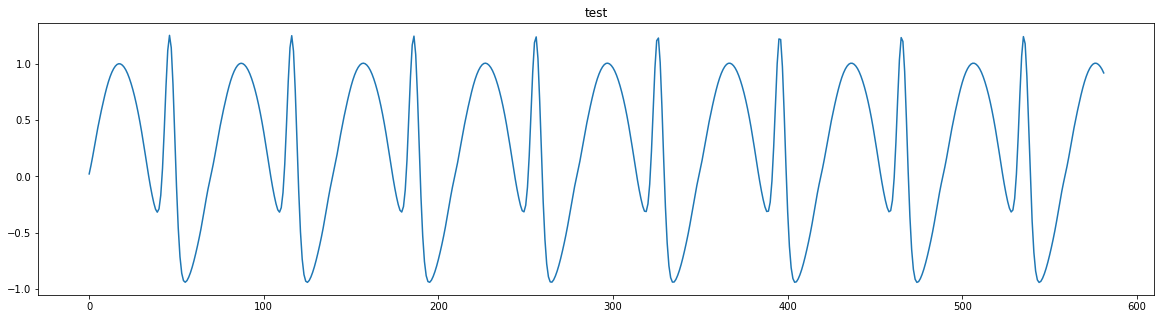

In [8]:
# Different speed - DOES NOT WORK - NEED TO FIND PHASE FIRST

phi   = 0.09
alpha = 1.01

w11 = alpha*math.cos(phi)
w12 = alpha*math.sin(phi)
w21 =-w12
w22 = w11

modi_kernel_output = []
network_output_collector = []
modification = [1] * len(W)
modi_kernel = 29
modification[modi_kernel] = modification[modi_kernel] - 50
modification[modi_kernel+10] = modification[modi_kernel+10] - 15

outH1=[]
outH2=[]

for t in range(n*6):
        if t==0:
            outH1.append(-0.2012)
            outH2.append(0.0)
        else:
            outH1.append(np.tanh(w11*outH1[t-1]+w12*outH2[t-1]))
            outH2.append(np.tanh(w22*outH2[t-1]+w21*outH1[t-1]))

        for j in range(nc):
            K = np.exp(-(np.power((outH1[t]-cx[j]),2)+np.power((outH2[t]-cy[j]),2))/s)
            network_output = network_output + ((W[j]*modification[j]) * K)
            
            if j==modi_kernel:
                modi_kernel_output.append(K)

        network_output_collector.append(network_output)
        
        network_output = 0;

fig=plt.figure(figsize=(20, 5))        
plt.plot(range(len(outH1)), network_output_collector)
plt.title("test")
fig=plt.gcf()